# Titanic Dataset

## Importing Modules

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {"figure.figsize": (12, 10)})
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Loading Dataset

In [139]:
df = pd.read_csv('titanic_data.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Type of Features:**

- **Categorical -** Sex, and Embarked
- **Continuous -** Age, and Fare
- **Discrete -** SibSp, Survived, Pclass, and Parch
- **Alphanumeric -** Cabin

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

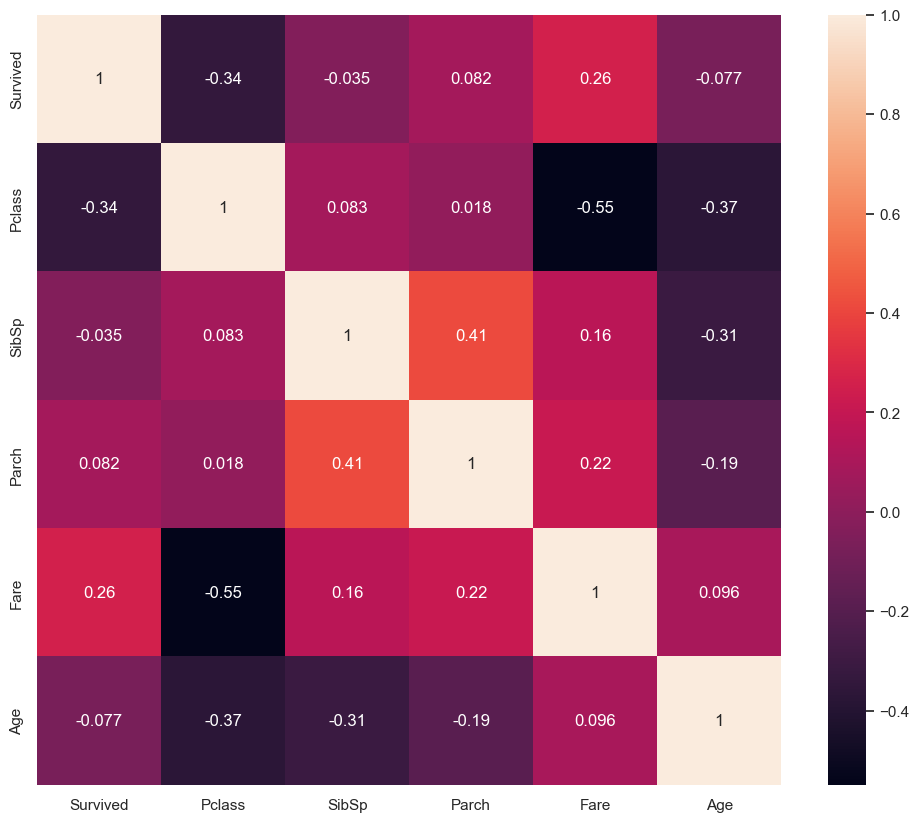

In [143]:
heatmap = sns.heatmap(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

The Heatmap may be misleading, because it only looks for the **linear** relationship, but not all reasonable relationships maybe linear... as we see with _SibSp_ below

## sibsp - Nuumber of siblings / spouses aboard the Titanic

In [144]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

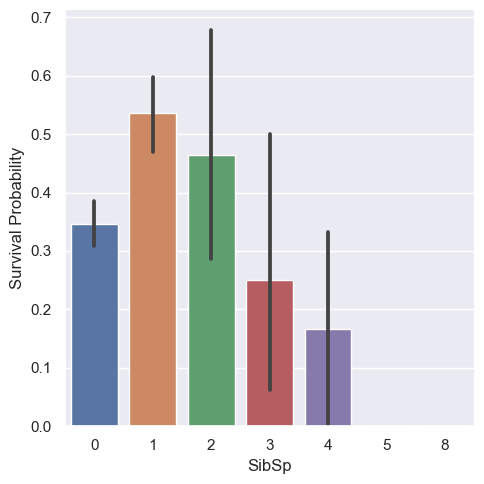

In [145]:
sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar").set_ylabels("Survival Probability")

This Relatioinship seems reasonable, but not shown by the heatmap

## Age

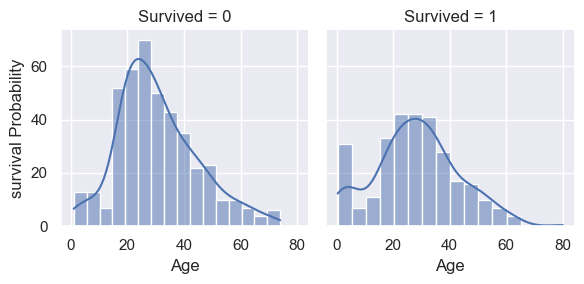

In [146]:
age_visual = sns.FacetGrid(df, col = "Survived")
age_visual = age_visual.map(sns.histplot, "Age", kde = True).set_ylabels("survival Probability")

## Sex

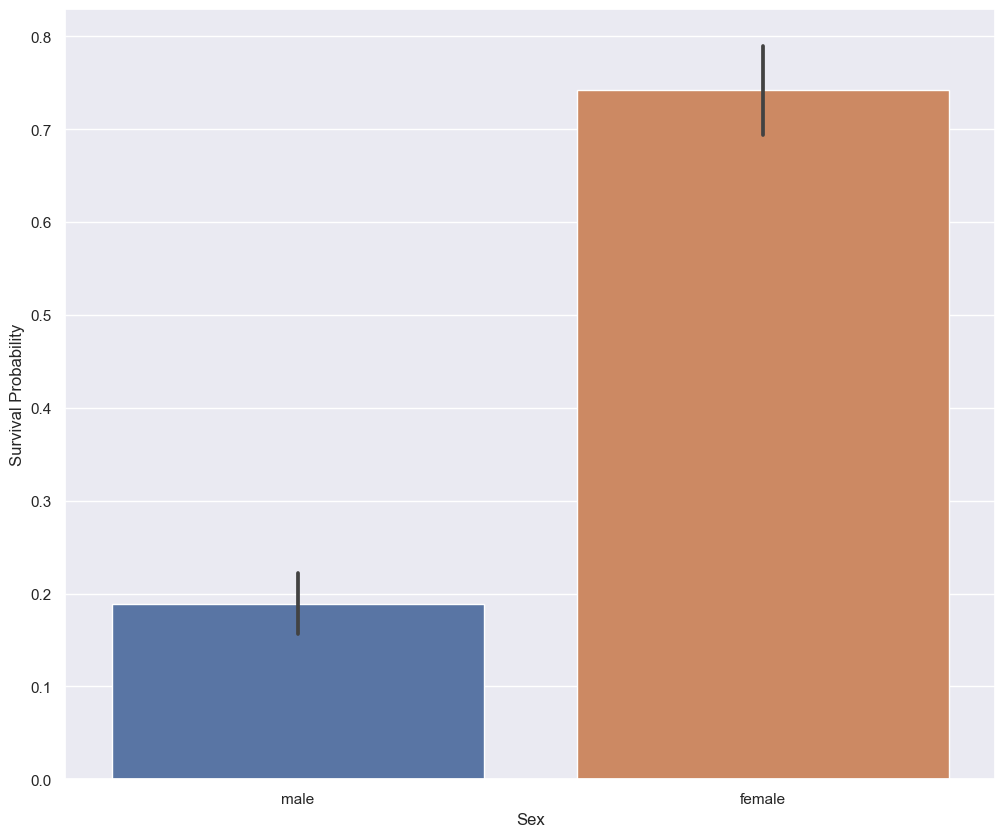

In [147]:
age_plot = sns.barplot(x = "Sex", y = "Survived", data = df).set_ylabel("Survival Probability")

In [148]:
df[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Pclass

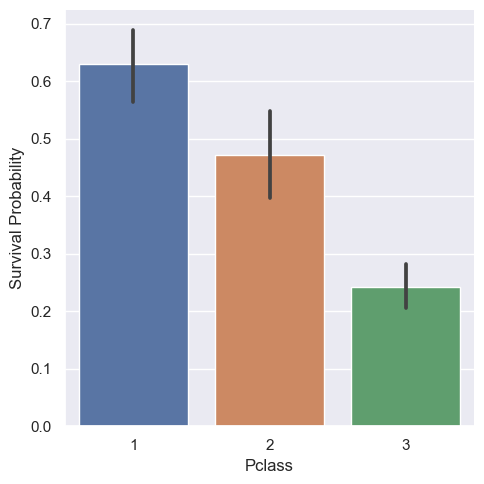

In [149]:
sns.catplot(data = df, x = "Pclass", y = "Survived", kind = "bar").set_ylabels("Survival Probability")

Clear favour to the first class passangers

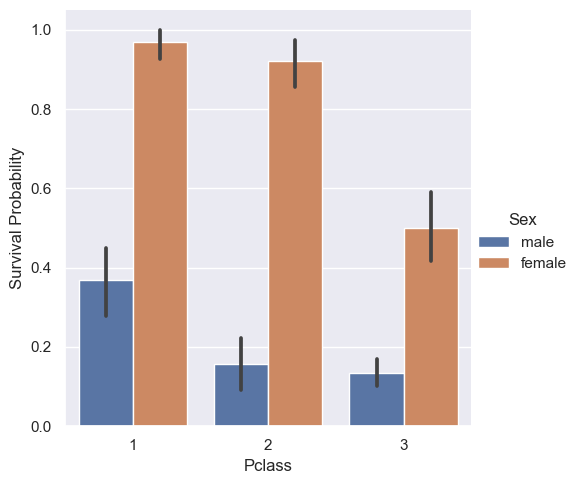

In [150]:
sns.catplot(data = df, x = "Pclass", y = "Survived", kind = "bar", hue = "Sex").set_ylabels("Survival Probability")

## Embarked

In [151]:
df['Embarked'].isnull().sum()

2

In [152]:
data = df.dropna(subset=['Embarked'])
print(f"{df.shape} -> {data.shape}")

(891, 12) -> (889, 12)


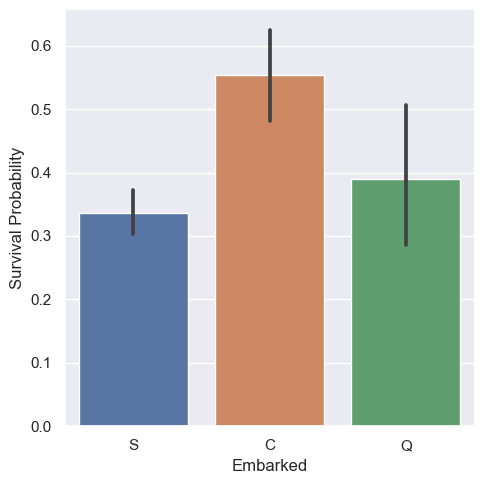

In [153]:
sns.catplot(data = data, x = "Embarked", y = "Survived", kind = "bar").set_ylabels("Survival Probability")

**For what reason??**

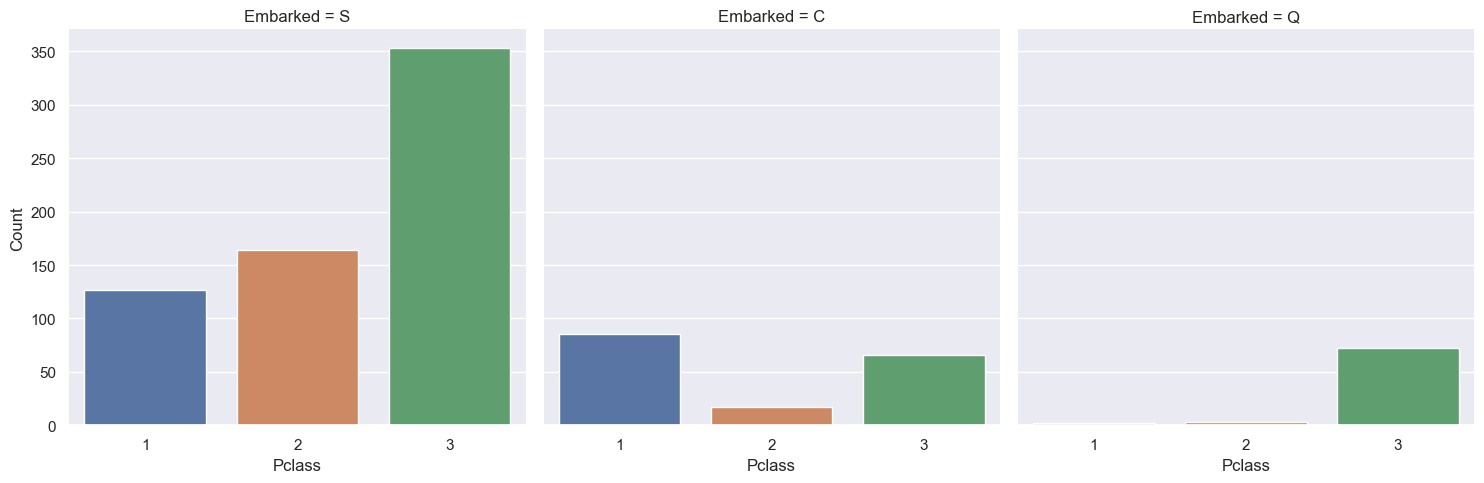

In [154]:
graph = sns.catplot(data = data, col = "Embarked", x = "Pclass", kind = "count")
graph.despine(left = True)
graph = graph.set_ylabels("Count")

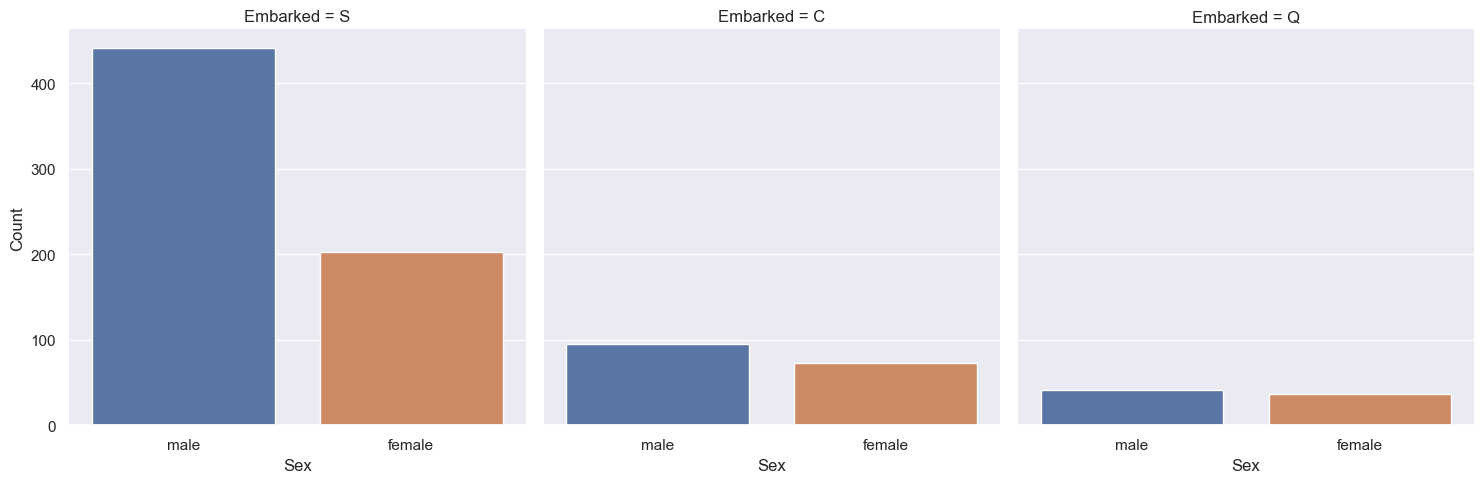

In [155]:
graph = sns.catplot(data = data, col = "Embarked", x = "Sex", kind = "count")
graph.despine(left = True)
graph = graph.set_ylabels("Count")

Now infer from these two set of graphs

## Preparation of Data

In [156]:
data = pd.read_csv('titanic_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
data = data.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [158]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
5,0,3,male,NaN,0
6,0,1,male,54.0,0
7,0,3,male,2.0,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


#### Dealing With Null Values

In [160]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [161]:
print(f"Mean = {mean}, Std = {std}, numebr of null values = {is_null}")

Mean = 29.69911764705882, Std = 14.526497332334044, numebr of null values = 177


In [162]:
rand_age = np.random.randint(mean-std, mean+std, size = 177)

In [163]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    42.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [164]:
data['Age'] = a

In [165]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [166]:
data['Sex'] = data['Sex'].map({"male":0, "female":1})

In [167]:
data.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,0,22.0,1
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,1
4,0,3,0,35.0,0


## Splitting the data

In [168]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Scaling

In [170]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

## Classification

In [171]:
logreg = LogisticRegression()
svc_class = SVC()
dt_class = DecisionTreeClassifier()
knn_class = KNeighborsClassifier(5)
rf_class = RandomForestClassifier(n_estimators=1000)

In [172]:
logreg.fit(x_train, y_train)
svc_class.fit(x_train, y_train)
dt_class.fit(x_train, y_train)
knn_class.fit(x_train, y_train)
rf_class.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [173]:
logreg_ypred = logreg.predict(x_test)
svc_ypred = svc_class.predict(x_test)
dt_ypred = dt_class.predict(x_test)
knn_ypred = knn_class.predict(x_test)
rf_ypred = rf_class.predict(x_test)

In [174]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, logreg_ypred)
svc_acc = accuracy_score(y_test, svc_ypred)
dt_acc = accuracy_score(y_test, dt_ypred)
knn_acc = accuracy_score(y_test, knn_ypred)
rf_acc = accuracy_score(y_test, rf_ypred)

In [176]:
print(f"Logistic Regression :    {logreg_acc*100:.2f}%")
print(f"Support Vector      :    {svc_acc*100:.2f}%")
print(f"Descision Tree      :    {dt_acc*100:.2f}%")
print(f"K-NN Classifier     :    {knn_acc*100:.2f}%")
print(f"Random Forest       :    {rf_acc*100:.2f}%")

Logistic Regression :    80.22%
Support Vector      :    81.72%
Descision Tree      :    77.24%
K-NN Classifier     :    80.60%
Random Forest       :    80.22%
